# Frequency Warping

These propertes of the allpass can now be used to “warp” the frequency scale of a flter (by eﬀectvely replacing $e^{jΩ}\leftarrow e^{j ϕ(Ω)}$ in our frequency response), for instance to map it according to the so-called **Bark scale**, used in psycho-acoustcs.

A common approximaton of the Bark scale is 
### $$Bark=13⋅arctan(0.0076⋅f )+3.5⋅arctan(( f /7500)^2)$$
(From Wikipedia, Bark scale, the approximaton goes back to Zwicker and Terhard), where f is the frequency in Hz. The Bark scale can be seen as an approximaton of the changing frequency resoluton over frequency of the inner ear flters of the human cochlea.

Because of the structure of our chochlea, the ear has diﬀerent sensitvites for diﬀerent frequencies and diﬀerent signals. The signal dependent threshold of audibility of the ear is called the Masking Threshold. It has more spectral detail at lower than at higher frequencies, according to the Bark scale.

We can plot it using the python program

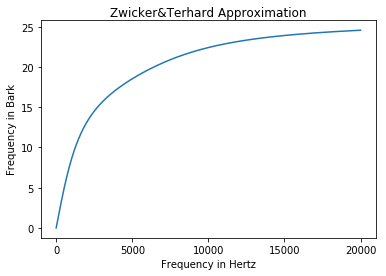

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

#Frequency array between 0 and 20000 Hz in 1000 steps:
f = np.linspace(0,20000,1000)

#Computation of Zwickers Bark approximation formula:
z = 13 * np.arctan(0.00076 * f) + 3.5 * np.arctan((f / 7500.0) ** 2)

#plot Bark over Hertz:
plt.plot(f,z)
plt.xlabel('Frequency in Hertz')
plt.ylabel('Frequency in Bark')
plt.title('Zwicker&Terhard Approximation')

Here we can see, that 1 bark at lower frequency has a much lower bandwidth than at higher frequencies. This means the ear can be seen as having a higher frequency resoluton at lower frequencies than at higher frequencies. Imagine, we want to **design a filter** or system for **hearing purposes**, for instance, we would like to model the masking threshold of the ear for any given signal by some linear filter (FIR or IIR). Then it would be useful, to give this filter **a higher frequency resoluton at lower frequencies**, such that it matches the smaller details of the masking threshold at lower frequencies. But if we look at **the usual design methods**, they distribute the filter details **independent of the frequency range** (for instance what we saw with the remez method, where we have equally distributed ripples). Here we can now use frequency warping, such that **we enlarge the low frequency range** and shrink the high frequency range accordingly, such that our flter now works on the **warped frequency**, and **“sees” the lower frequencies in more detail**, the lower frequencies are more spread out in comparison to the higher frequencies.

How do we do this? For some frequency response $H(e^{jΩ})$ we would like to warp the frequency Ω with some function ϕ(Ω) according to our desired frequency scale, such that we get 
### $$H(e^{j⋅ϕ(Ω)})$$. 
But this is exactly the principle of an **allpass flter**, which has the frequency response 
### $$H_{ap}(e^{jΩ})=e^{j⋅ϕ_{ap}(Ω)}$$
Usually we would like to map positive frequencies to again positive frequencies, and we saw that ϕap(Ω) becomes negative, hence we take the approach to **replace** $z$ in the argument of our transfer function with the reverse of our **allpass** transfer functon:
### $$ z^{-1} \leftarrow H_{ap}(a,z)$$

This is replacing all delays of our filter to be warped by our allpass flter. In this way we replace our linear function on the unit circle in $z$ with the non-linear, warped function on the unit circle $H_{ap}$.

Hence we get the warped transfer functon as 
### $$H_{warped}(z)=H (H_{ap}(a, z)^{−1})$$

and the resultng frequency response becomes
### $$ H_{warped}(e^{jΩ}) = H(e^{−j⋅ϕ_{ap}(Ω)}) $$

Here we can now see that we obtained the **desired frequency warping.**